**Problem Set #1**

Computational Electromagnetism and Applications (ΥΦΥ203)

Implemented by: **Anastasios-Faidon Retselis (AEM: 4394)**

# Exercise 1.1

## Problem Statement

The numerical phase velocity for the solution of the discrete one dimensional wave equation is given by the following formula:

$$
v_{p}=\omega / \tilde{k}=\frac{2 \pi c}{\cos ^{-1}\left\{\frac{\Delta x^{2}}{(c \Delta t)^{2}}[\cos (\omega \Delta t)-1]+1\right\}} \frac{\Delta x}{\lambda_{o}}
$$

Plot the fraction of the numerical to the explicit phase velocity (see slide 2-12 of S. Gedney) as a function of the fraction $\Delta x/\lambda$ for (a) $c\Delta t = \Delta x/2$ and (b) $c\Delta t = \Delta x/4$.

## Solution

Let us work on the expression above. 
For $c\Delta t = \Delta x/2$, we can simplify the expression as:

$$
\frac{v_{p}}{c}=\frac{2 \pi}{\cos ^{-1}\left\{\frac{\Delta x^{2}}{\frac{(\Delta x)^{2}}{4}}[\cos (\frac{2 \pi \Delta x}{2 \lambda_{0}})-1]+1\right\}} \frac{\Delta x}{\lambda_{o}}
$$

or finally:

$$
\frac{v_{p}}{c}=\frac{2 \pi}{\cos ^{-1}\left\{4[\cos (\frac{\pi \Delta x}{\lambda_{0}})-1]+1\right\}} \frac{\Delta x}{\lambda_{o}}
$$

While for $c\Delta t = \Delta x/4$, the expression can be simplified as:

$$
\frac{v_{p}}{c}=\frac{2 \pi}{\cos ^{-1}\left\{\frac{\Delta x^{2}}{\frac{(\Delta x)^{2}}{16}}[\cos (\frac{2 \pi \Delta x}{4 \lambda_{0}})-1]+1\right\}} \frac{\Delta x}{\lambda_{o}}
$$

or finally:

$$
\frac{v_{p}}{c}=\frac{2 \pi}{\cos ^{-1}\left\{16[\cos (\frac{\pi \Delta x}{2 \lambda_{0}})-1]+1\right\}} \frac{\Delta x}{\lambda_{o}}
$$

We can transfer this equation to code and plot the result using Python.

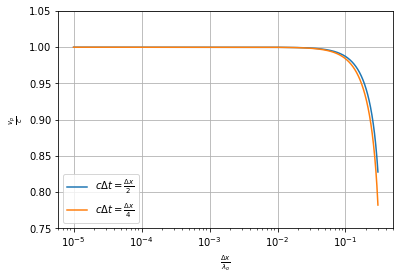

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Make jupyter export images as .pdf files for higher quality
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# Case a: cΔt=Δx/2

# x_values correspond to Δx/lambda_0
x_values = np.linspace(0.00001,0.3,10000)
# y_values correspond to v_ph/c

# Case a: cΔt=Δx/2
y_values = 2*np.pi/(np.arccos(4*(np.cos(np.pi*x_values)-1)+1))*x_values
plt.semilogx(x_values, y_values,label=r'$c\Delta t=\frac{\Delta x}{2}$')
plt.ylim(0,1.2)

# Case b: cΔt=Δx/4
y_values = 2*np.pi/(np.arccos(16*(np.cos(np.pi*x_values/2)-1)+1))*x_values
plt.semilogx(x_values, y_values,label=r'$c\Delta t=\frac{\Delta x}{4}$')
plt.legend()
plt.ylim(0.75,1.05)
plt.xlabel(r'$\frac{\Delta x}{\lambda_{o}}$')
plt.ylabel(r'$\frac{v_{p}}{c}$')
plt.grid()
plt.show()

# Exercise 1.2

## Problem Statement

Write the appropriate code in order to investigate the one dimensional wave equation $\frac{\partial^{2} u}{\partial x^{2}}=\frac{1}{c^{2}} \frac{\partial^{2} u}{\partial t^{2}}$ with an explicit (see slide 2-4 of S. Gedney) and an implicit (see slide 2-29 of S. Gedney) numerical grid with second order of accuracy.

Condsider the following assumptions:

- Assume that c=1
- As an initial condition, consider a rectangular pulse defined as: 
$$
u_{i}^{-1}=\left\{\begin{array}{l}
1, i=2 \ldots 11 \\
0, elsewhere
\end{array}\right.
$$
- For $u_{i}^{0}$ consider the same rectangular pulse that has shifted to the right by one grid point.
- Use Dirchlet boundary conditions for the two limits of the computational grid ($u^{n}=0$)
- Show frames of the wave every 25 time steps for the first 100 time steps (make sure the computational grid is big enough in order to ensure that the pulse will not reach the limits in these 100 time steps). The frames ($u_{i}$ for $n=25, 50, 75, 100$) shall be given for the explicit and the implicit case and for three different time steps ($\Delta t =0.9 \Delta x/c$,  $\Delta t = \Delta x/c$ and $\Delta t =1.1 \Delta x/c$
- Discuss the frames and attempt to explain what is being shown (in relation to the shape of the pulse)

## Explicit Solution

Let us first examine the **explicit** case. The explicit time-marching solution is given by the following formula:

$$
f_{i}^{n+1}=(c \Delta t)^{2}\left[\frac{f_{i+1}^{n}-2 f_{i}^{n}+f_{i-1}^{n}}{(\Delta x)^{2}}\right\rfloor+2 f_{i}^{n}-f_{i}^{n-1}+O\left[(\Delta x)^{2}\right]+O\left[(\Delta t)^{2}\right]
$$

which we can implement as a Python script using the initial and boundary conditions from the problem statement to solve the 1D FDTD Stencil. The following code is used:

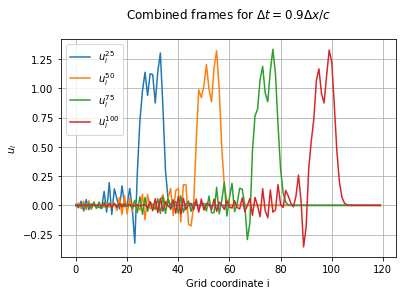

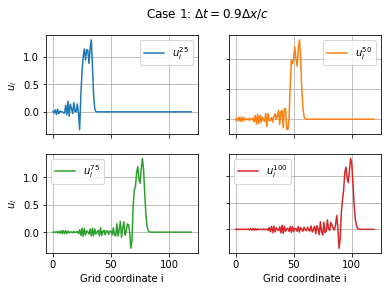

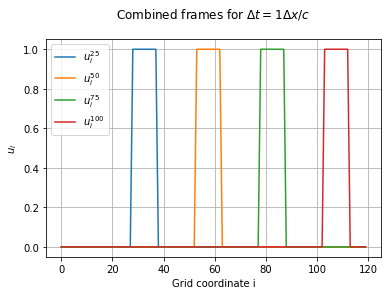

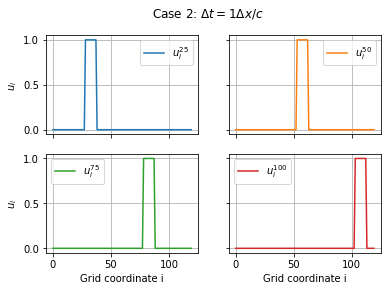

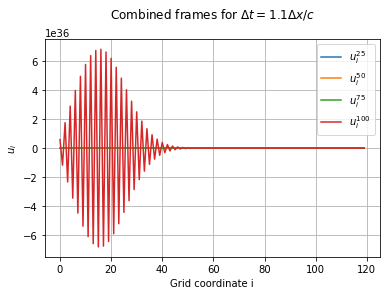

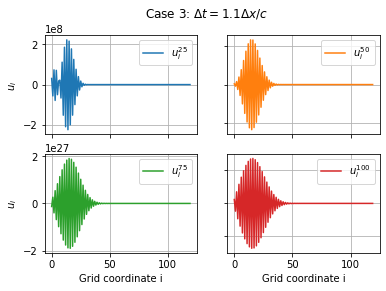

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Make jupyter export images as .pdf files for higher quality
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

def initial_conditions(array):
    # Defines initial conditions for the problem
    # Input is a 2D array
    # Output is the 2D array with the applied initial/boundary conditions
    lower_limit = 2
    upper_limit = 11
    for i in range(lower_limit-1,upper_limit):
        array[0][i] = 1
        array[1][i+1] = 1
    return(array)

def solve_1D_FDTD_stencil(u, dx, dt):
    # Solves the 1D FDTD Stencil
    # Input is the grid in form of a 2D array w/ initial+boundary conditions
    # Output is the grid
    for n in range(1, size-1):
        for i in range(0, size-1):
            u[n+1][i] = pow(c*dt, 2)*((u[n][i+1]-2*u[n][i]+u[n][i-1])/pow(dx,2)) + 2*u[n][i] - u[n-1][i]
    return(u)

def plot_frame(array, id1, id2, id3, id4, case):
    # Extract frames from an array and plots them
    # Note that with this convention we have if we request frame number i the index of the frame is i+2
    plt.ylabel(r'$u_{i}$')
    plt.xlabel('Grid coordinate i')
    frame1 = array[id1+2,:]
    frame2 = array[id2+2,:]
    frame3 = array[id3+2,:]
    frame4 = array[id4+2,:]
    fig1 = plt.plot(frame1, label=r'$u_{{i}}^{{{}}}$'.format(id1))
    plt.plot(frame2, label=r'$u_{{i}}^{{{}}}$'.format(id2))
    plt.plot(frame3, label=r'$u_{{i}}^{{{}}}$'.format(id3))
    plt.plot(frame4, label=r'$u_{{i}}^{{{}}}$'.format(id4))
    plt.grid()
    plt.legend()
    plt.title('Combined frames for $\Delta t={}\Delta x/c$\n'.format(case))
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(frame1, label=r'$u_{{i}}^{{{}}}$'.format(id1))
    axs[0, 0].grid()
    axs[0, 0].legend()
    axs[0, 1].plot(frame2, 'tab:orange', label=r'$u_{{i}}^{{{}}}$'.format(id2))
    axs[0, 1].grid()
    axs[0, 1].legend()
    axs[1, 0].plot(frame3, 'tab:green', label=r'$u_{{i}}^{{{}}}$'.format(id3))
    axs[1, 0].grid()
    axs[1, 0].legend()
    axs[1, 1].plot(frame4, 'tab:red', label=r'$u_{{i}}^{{{}}}$'.format(id4))
    axs[1, 1].grid()
    axs[1, 1].legend()
    for ax in axs.flat:
        ax.set(xlabel=r'Grid coordinate i', ylabel=r'$u_{i}$')
    for ax in axs.flat:
        ax.label_outer()
    
size = 120
c = 1

# Case 1
dx = 0.1
a = 0.9
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = solve_1D_FDTD_stencil(u, dx, dt)

# Extract and plot frames for case 1
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 1: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

# Case 2
dx = 0.1
a = 1
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = solve_1D_FDTD_stencil(u, dx, dt)

# Extract and plot frames for case 2
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 2: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

# Case 3
dx = 0.1
a = 1.1
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = solve_1D_FDTD_stencil(u, dx, dt)

# Extract and plot frames for case 3
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 3: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

## Explicit case discussion

Based on the figures above, we can determine that the pulse maintains its rectangular shape only for the case of the magic time step, namely the case where $\Delta t = \Delta x/c$. The absrupt step discontinuities are modelled perfectly and the pulse is perfectly preserved. For the case of $\Delta t = 0.9\Delta x/c$, we can also observe that the pulses generate the so called "ringing" which lags behind the corresponding disconinuity. This lag is pretty small and difficult to make out from these figures. The results of the dispersion are also to be observed. Finally, for $\Delta t = 1.1\Delta x/c$, we have violated the numerical stability criterion which dictates that $\Delta t \leq \frac{\Delta x}{c}$ while we now have chosen a value for which $\Delta t > \frac{\Delta x}{c}$. This means that it is certain that our numerical method is unstable and the values grow exponentially, leading to no useful results.

## Implicit case

Let us now consider the **implicit** case. We will use the following formula to calculate for each time step:

$$
f^{n+1}=2[A]^{-1}[B] f^{n}-[A]^{-1}[C] f^{n-1}
$$

where,

$$
[A]=[C]=\beta[L]+\frac{\Delta x^{2}}{\left(c_{o} \Delta t\right)^{2}}[I], \quad[B]=\frac{2 \beta-1}{2}[L]+\frac{\Delta x^{2}}{\left(c_{o} \Delta t\right)^{2}}[I]
$$

L is a tridiagonal Matrix with values of 2 in the main diagonal and values of -1 in the remaining diagonals. I is the identity martix. To achieve accuracy of second order, we must choose a value of $\beta = 1/4$. The following code will give us the implicit solution:

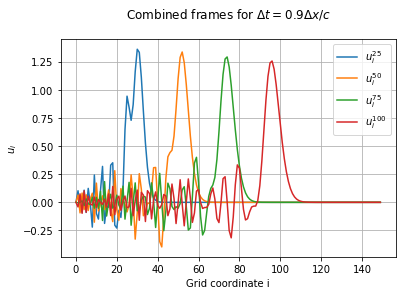

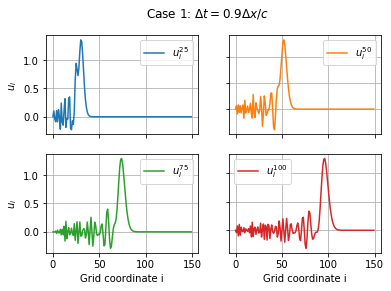

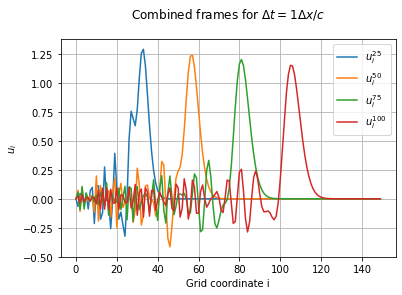

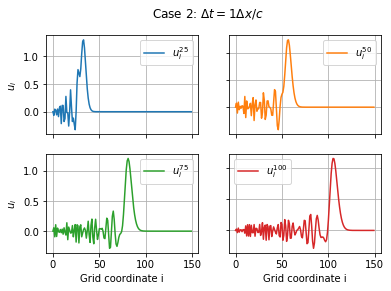

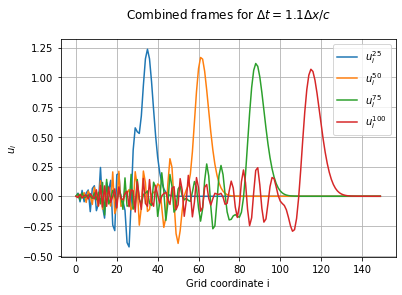

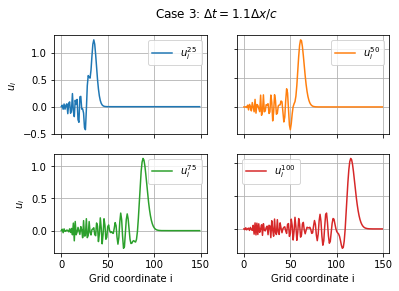

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Make jupyter export images as .pdf files for higher quality
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

def initial_conditions(array):
    # Defines initial conditions for the problem
    # Input is a 2D array
    # Output is the 2D array with the applied initial/boundary conditions
    lower_limit = 2
    upper_limit = 11
    for i in range(lower_limit-1,upper_limit):
        array[0][i] = 1
        array[1][i+1] = 1
    return(array)

def tridiagonal_matrix(size):
    # Returns a tridiagonal matrix for the implicit solution
    # Input is size of the matrix (dimensions size x size)
    # Output is the tridiagonal matrix with 2 in main diagonal and -1 in the other two
    matrix = np.zeros((size, size))
    for columns in range(0,size):
        for rows in range(0,size):
            if columns == rows:
                matrix[rows][columns] = 2
            elif columns == rows + 1:
                matrix[rows][columns] = -1
            elif columns == rows -1:
                matrix[rows][columns] = -1
    return(matrix)

def identity_matrix(size):
    # Returns an identity matrix given a desired size
    # Input is size of the matrix (dimensions size x size)
    # Output is the corresponding identity matrix
    matrix = np.zeros((size, size))
    for columns in range(0,size):
        for rows in range(0,size):
            if columns == rows:
                matrix[rows][columns] = 1
    return(matrix)

def matrix_addition(A, B):
    # Computes and returns the result of the addition for two matrices A and B
    # Input is the two matrices
    # Output is the result of the addition
    
    # Check if addition is possible
    if (A.shape[0] != B.shape[0]):
        raise ValueError('Matrices must have same number of rows and columns!')
    if(len(B.shape) != 1):
         if A.shape[1] != B.shape[1]:
                raise ValueError('Matrices must have same number of rows and columns!')
    rows_number = A.shape[0]
    if(len(B.shape) == 1):
        columns_number = 1
    else:
        columns_number = B.shape[1]
    result_matrix = np.zeros((rows_number, columns_number)) 
    # Add matrices
    for columns in range(columns_number):
        for rows in range(rows_number):
            if len(B.shape) == 1:
                result_matrix[rows] = A[rows] + B[rows]
            else:
                result_matrix[rows][columns] = A[rows][columns] + B[rows][columns]
    return(result_matrix)        

def matrix_multiplication(A, B):
    # Computes and returns the result of the multiplication for two matrices A and B
    # Input is the two matrices
    # Output is the result of the multiplication A*B
    
    # Check if multiplication is possible
    if (A.shape[1] != B.shape[0]):
        raise ValueError('Matrix multiplication not possible!')
    if len(B.shape) == 1:
        columns_B = 1
        result_matrix = np.zeros((A.shape[0], 1))
    else:
        columns_B = B.shape[1]
        result_matrix = np.zeros((A.shape[0], B.shape[1]))
    rows_B = B.shape[0]
    rows_A = A.shape[0]
    # Multiply matrices
    for i in range(0, rows_A):
        for j in range(0, columns_B):
            for k in range(0, rows_B):
                if columns_B == 1:
                    result_matrix[i][j] += A[i][k] * B[k]
                else:
                    result_matrix[i][j] += A[i][k] * B[k][j]
    return(result_matrix)
    
def implicit_solution(grid, dx, dt, c, beta):
    size = grid.shape[1] - 2
    # Define L and I matrices
    L = tridiagonal_matrix(size)
    L_temp = beta * L
    I = identity_matrix(size)
    I = (pow(dx,2)/(c*pow(dt,2))) * I
    # Compute A, B, C and A^-1 matrices
    A = matrix_addition(L_temp,I)
    C = A
    L_temp = ((2*beta-1)/2) * L
    B = matrix_addition(L_temp, I)
    A_inverse = np.linalg.inv(A)
    # Compute the solution
    A_inverse_B = matrix_multiplication(A_inverse, B)
    A_inverse_C = matrix_multiplication(A_inverse, C)
    for n in range(2, len(grid)):
        f_prev = grid[n-2,1:len(grid)-1]
        f_now = grid[n-1,1:len(grid)-1]
        f_next = matrix_addition(2 * matrix_multiplication(A_inverse_B, f_now), -1 * matrix_multiplication(A_inverse_C, f_prev))
        # Insert f_next in grid
        for i in range(1, len(grid)-1):
            grid[n][i] = f_next[i-1]
    return(grid)

def plot_frame(array, id1, id2, id3, id4, case):
    # Extract frames from an array and plots them
    # Note that with this convention we have if we request frame number i the index of the frame is i+2
    plt.ylabel(r'$u_{i}$')
    plt.xlabel('Grid coordinate i')
    frame1 = array[id1+2,:]
    frame2 = array[id2+2,:]
    frame3 = array[id3+2,:]
    frame4 = array[id4+2,:]
    fig1 = plt.plot(frame1, label=r'$u_{{i}}^{{{}}}$'.format(id1))
    plt.plot(frame2, label=r'$u_{{i}}^{{{}}}$'.format(id2))
    plt.plot(frame3, label=r'$u_{{i}}^{{{}}}$'.format(id3))
    plt.plot(frame4, label=r'$u_{{i}}^{{{}}}$'.format(id4))
    plt.grid()
    plt.legend()
    plt.title('Combined frames for $\Delta t={}\Delta x/c$\n'.format(case))
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].plot(frame1, label=r'$u_{{i}}^{{{}}}$'.format(id1))
    axs[0, 0].grid()
    axs[0, 0].legend()
    axs[0, 1].plot(frame2, 'tab:orange', label=r'$u_{{i}}^{{{}}}$'.format(id2))
    axs[0, 1].grid()
    axs[0, 1].legend()
    axs[1, 0].plot(frame3, 'tab:green', label=r'$u_{{i}}^{{{}}}$'.format(id3))
    axs[1, 0].grid()
    axs[1, 0].legend()
    axs[1, 1].plot(frame4, 'tab:red', label=r'$u_{{i}}^{{{}}}$'.format(id4))
    axs[1, 1].grid()
    axs[1, 1].legend()
    for ax in axs.flat:
        ax.set(xlabel=r'Grid coordinate i', ylabel=r'$u_{i}$')
    for ax in axs.flat:
        ax.label_outer()

size = 150
c = 1
beta = 1/4
dx = 0.1

# Case 1
a = 0.9
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = implicit_solution(u, dx, dt, c, beta)

# Extract and plot frames for case 1
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 1: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

# Case 2
a = 1
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = implicit_solution(u, dx, dt, c, beta)

# Extract and plot frames for case 2
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 2: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

# Case 3
a = 1.1
dt = a*dx/c
u = np.zeros((size, size)) 
u = initial_conditions(u)
u = implicit_solution(u, dx, dt, c, beta)

# Extract and plot frames for case 3
plot_frame(u, 25, 50, 75, 100, a)
plt.suptitle('Case 3: $\Delta t={}\Delta x/c$\n '.format(a))
plt.show()

## Implicit case discussion

Since this formulation is unconditionally stable, we no longer have a problem with the $\Delta t = 1.1 \Delta x/c$ case which is now stable. However, we can observe that for all cases the shape of the pulse has been further distorted and the effects of the dispersion can be observed in all cases. In a sense, this methodology is always stable (compared to the explicit method which is only stable for $\Delta t \leq \frac{\Delta x}{c}$) but results in reduced accuracy for the representation of the pulse. We can also note a significant difference in grid coordinates for each case, meaning the pulse appears either "earlier" or "later" than expected for any given frame if we compare between the three cases.